# O que é a computação quântica

A computação quântica tem se destacado como sendo um novo paradigma da computaçãom, na qual se destaca por sua capacidade de processamento em paralelo de muitas entradas. Enquanto na computaçaõ quântica nós temos os bits que podem assumir os valores de 0 ou 1, na computação quântica temos os chamados quantum bits ou qubits que podem se encontrar nos valores de 0 e 1 simultaneamente. Isso pode proporcionar avanços consideraveis em comparação a computação atual.
@russon_2017 @deutsch1992rapid.

## Fundamentos

## Qubits

**Definição:** Qubits assim como os bits na computação as menores unidades de informações possiveis. Eles são representados como $a|\uparrow\rangle + b|\rightarrow\rangle$, onde $a$ e $b$ são números complexos
e  $|\uparrow\rangle$ e $|\rightarrow\rangle$ são vetores.

$$ |0\rangle = \begin{bmatrix} 1 \\ 0\end{bmatrix} 
|1\rangle = \begin{bmatrix} 0 \\ 1\end{bmatrix}$$

Considerando isso nós dizemos que temos uma probabilidade de $|a|^2$ de encontrarmos o nosso qubits em
$|0\rangle$ e $|b|^2$ em $|1\rangle$, lembrando sempre que $|a|^2 + |b|^2 = 1$. Quando ambas probabilidades não são nulas os qubits se encontram em superposição, porém quando os observamos (medirmos) eles irão colapsar para umas das posições. Podemos visualizar um qubit como um vetor na chamada esfera de Bloch como mostrado abaixo:

@yanofsky2008quantum @rieffel2014quantum.

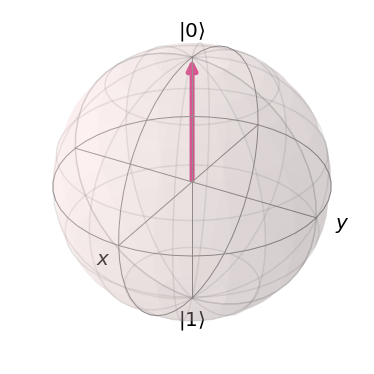

In [27]:
## Visualizando \0> 
qiskit.visualization.plot_bloch_vector([0, 0, 1])

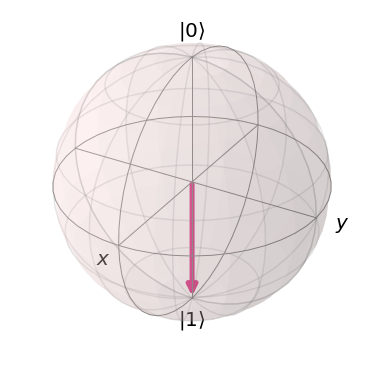

In [28]:
## Visualizando \1>
qiskit.visualization.plot_bloch_vector([0, 0, -1])

## Operadores Quânticos
**Definição:** Um operador quântico nada mais é do que uma matrix que age sobre os vetores (qubits) em um determinado circuito. Tais matrizes são chamadas de unitárias, o que significa que  $U\star U^\dagger = I$, todos os operadores quânticos devem ser matrizes unitárias. Algumas operações 
são realizadas em apenas um qubits como o Not que transforma o qubit $|0\rangle$ em $|1\rangle$ e vice-versa ou Hadamard que transforma um único qubit em uma superposição com dois qubits
$H |0\rangle = \frac{|0\rangle+1\rangle}{\sqrt{2}}$ e $H |1\rangle = \frac{|0\rangle-1\rangle}{\sqrt{2}}$, . Algumas outras operações dependem da presença de pelo menos mais um qubit para fazer sentido como o Not controlado ou C-not que muda o segundo qubit se o primeiro for um e.g $|10\rangle$ se torna $|11\rangle$ . Tais operadores podem ser representados por matrizes de transformação tais quais:

$$X = \begin{bmatrix} 0 && 1 \\ 1 && 0\end{bmatrix}$$

$$H = \begin{bmatrix} 1 && 1 \\ 1 && -1\end{bmatrix}$$

@yanofsky2008quantum.

## Realizando algumas operações com um qubit
 
Uma das primeiras operações que podemos fazer é transformar o qubit $|0\rangle$ em $|1\rangle$. Antes disso precisamos importar as bibliotecas necessárias, IBMQ.load_accounts() permite temos acesso a execução computadores reais da fornecidos pela IBM Quantum Expirience acesse: https://quantumexperience.ng.bluemix.net/ ou ignore o comando mudando o backend para qasm_simulator .

In [13]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account

from qiskit import * 
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
IBMQ.load_accounts()

In [31]:
## Obtendo nosso backend
backend = IBMQ.get_backend('ibmqx2')

qr = QuantumRegister(1)
cr = ClassicalRegister(1)
qc = QuantumCircuit(qr, cr)
# Aplicando a matrix X

qc.x(qr[0])
qc.measure(qr[0], cr[0])

## Desenhando o circuito
qc.draw(output='mpl')
# Obtendo os resultados
job = execute(qc, backend)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)